# Question 1:
#### Step a: Preprocessing <br> Importing required libraries and then we process the data as explained in the report:

In [23]:
import os
import string
import math
from nltk.corpus import stopwords
stopWords = stopwords.words("english")

In [24]:
folderPath = "F:/uni/Term7/MIR/homeWorks/HW2/documents/document"
for fileName in os.listdir(folderPath):
    filePath = os.path.join(folderPath, fileName)
    if os.path.isfile(filePath):
        file = open(filePath, 'r', encoding='utf-8')
        content = file.read()
        translator = str.maketrans('', '', string.punctuation + "“”’—")
        contentPreprocessed = content.lower().translate(translator)
        terms = [word for word in list(contentPreprocessed.split()) if word not in stopWords]
        sortedTerms = sorted(terms)
        uniqueTerms = sorted(list(set(terms)))
        print(f"unique terms: {uniqueTerms}")
        with open(f"F:/uni/Term7/MIR/homeWorks/HW2/preprocessed/{fileName[:-4]} preProcessed.txt", 'w', encoding='utf-8') as preProcessed:
            preProcessed.write(contentPreprocessed)


unique terms: ['45yearold', '830', 'added', 'along', 'already', 'another', 'around', 'avoid', 'awkwardly', 'bag', 'balance', 'bandage', 'benefit', 'better', 'bruised', 'businesses', 'cause', 'charities', 'charity', 'clear', 'community', 'continue', 'coupons', 'curb', 'curbs', 'day', 'declined', 'determined', 'didnt', 'discomfort', 'discussion', 'eager', 'elbow', 'enjoy', 'ensure', 'even', 'event', 'events', 'expressed', 'fell', 'filled', 'fine', 'finished', 'forward', 'fun', 'funds', 'good', 'goodie', 'gratitude', 'greenfield', 'hazard', 'however', 'hurt', 'incident', 'injured', 'insisting', 'johnson', 'keep', 'knee', 'landed', 'let', 'lisa', 'little', 'local', 'looking', 'lost', 'love', 'meanwhile', 'measures', 'medal', 'medical', 'month', 'need', 'next', 'noting', 'obstacles', 'offered', 'one', 'organizers', 'park', 'participants', 'participate', 'participating', 'path', 'pavement', 'perseverance', 'personnel', 'plans', 'proud', 'race', 'raised', 'received', 'resident', 'riverside', 

<hr>

## Step b: Create Dictionary and Postings Lists

In [25]:
dictionary = dict()
documentNumber = 1
folderPath = "F:/uni/Term7/MIR/homeWorks/HW2/preprocessed"
for fileName in os.listdir(folderPath):
    filePath = os.path.join(folderPath, fileName)
    if os.path.isfile(filePath):
        file = open(filePath, 'r', encoding='utf-8')
        terms = list(file.read().split())
        uniqueTerms = sorted(list(set(terms)))
        for i in range(len(terms)):
            wordPositionDict = dict()
            wordPositionDict[documentNumber] = [i]
            if terms[i] in dictionary.keys():
                dictionary[terms[i]]["freq"] += 1
                if documentNumber not in dictionary[terms[i]]["postingList"].keys():
                    dictionary[terms[i]]["postingList"][documentNumber] = [i]
                else:
                    dictionary[terms[i]]["postingList"][documentNumber].append(i)     
            else:
                dictionary[terms[i]] = dict(freq = 1, postingList = wordPositionDict)
    documentNumber += 1
sortedDictionary  = {key: dictionary[key] for key in sorted(dictionary)}
sortedDictionary


{'1': {'freq': 1, 'postingList': {16: [300]}},
 '10': {'freq': 3, 'postingList': {12: [113], 16: [167], 17: [141]}},
 '100': {'freq': 1, 'postingList': {8: [205]}},
 '100000': {'freq': 1, 'postingList': {8: [129]}},
 '1015': {'freq': 1, 'postingList': {15: [103]}},
 '120': {'freq': 1, 'postingList': {10: [28]}},
 '1234': {'freq': 1, 'postingList': {15: [17]}},
 '15': {'freq': 2, 'postingList': {12: [115], 17: [143]}},
 '150': {'freq': 1, 'postingList': {3: [4]}},
 '15percent': {'freq': 1, 'postingList': {9: [38]}},
 '175000': {'freq': 1, 'postingList': {6: [452]}},
 '1999': {'freq': 1, 'postingList': {16: [290]}},
 '2': {'freq': 1, 'postingList': {18: [104]}},
 '20': {'freq': 2, 'postingList': {16: [169, 261]}},
 '200': {'freq': 1, 'postingList': {9: [149]}},
 '2000': {'freq': 1, 'postingList': {9: [64]}},
 '2010': {'freq': 1, 'postingList': {15: [46]}},
 '2015': {'freq': 1, 'postingList': {15: [21]}},
 '209': {'freq': 1, 'postingList': {16: [90]}},
 '214': {'freq': 1, 'postingList': {

<hr>

## Step c: Apply Front-Coding to Compress the Dictionary

In [26]:
def frontCoding(terms, search = False):
    result = []
    for i in range(0, len(terms), 4):
        temp = [0, 0, 0, 0]
        temp[0] = terms[i]
        if search and terms[i] == search:
            return search, search
        for t in range(1, min(4, len(terms)-i)):
            count = 0
            for j in range(min(len(terms[i+t]), len(temp[0]))):
                if terms[i+t][j] == temp[0][j]:
                    count += 1
                    if j == len(temp[0])-1:
                        temp[t] = (count, terms[i+t][j+1:])
                        break
                else:
                    temp[t] = (count, terms[i+t][j:])
                    break
                
            if search and terms[i+t] == search:
                return temp[0], temp[t]
        while 0 in temp:
            temp.remove(0)
        result.append(temp)
    return result

In [27]:
myList = frontCoding(list(sortedDictionary.keys()))
compressedDict = dict()
for block in myList:
    temp = dict()
    temp[block[0]] = sortedDictionary[block[0]]
    for i in range(1, len(block)):
        val = ""
        for j in range(block[i][0]):
            val += block[0][j]
        val += block[i][1]
        temp[block[i]] = sortedDictionary[val]
    compressedDict[block[0]] = temp
compressedDict

{'1': {'1': {'freq': 1, 'postingList': {16: [300]}},
  (1, '0'): {'freq': 3, 'postingList': {12: [113], 16: [167], 17: [141]}},
  (1, '00'): {'freq': 1, 'postingList': {8: [205]}},
  (1, '00000'): {'freq': 1, 'postingList': {8: [129]}}},
 '1015': {'1015': {'freq': 1, 'postingList': {15: [103]}},
  (1, '20'): {'freq': 1, 'postingList': {10: [28]}},
  (1, '234'): {'freq': 1, 'postingList': {15: [17]}},
  (1, '5'): {'freq': 2, 'postingList': {12: [115], 17: [143]}}},
 '150': {'150': {'freq': 1, 'postingList': {3: [4]}},
  (2, 'percent'): {'freq': 1, 'postingList': {9: [38]}},
  (1, '75000'): {'freq': 1, 'postingList': {6: [452]}},
  (1, '999'): {'freq': 1, 'postingList': {16: [290]}}},
 '2': {'2': {'freq': 1, 'postingList': {18: [104]}},
  (1, '0'): {'freq': 2, 'postingList': {16: [169, 261]}},
  (1, '00'): {'freq': 1, 'postingList': {9: [149]}},
  (1, '000'): {'freq': 1, 'postingList': {9: [64]}}},
 '2010': {'2010': {'freq': 1, 'postingList': {15: [46]}},
  (3, '5'): {'freq': 1, 'posting

<hr>

## Step d: Apply Gamma Encoding to Compress Postings Lists

In [28]:
def deltaEncoding(postingList):
    if len(postingList) == 1:
        return postingList
    myList = [postingList[0]]
    for i in range(1, len(postingList)):
        myList.append(postingList[i] - postingList[i-1])
    return myList

def gammaEncoding(postingList):
    resultList = []
    for i in range(len(postingList)):
        result = ""
        binary = bin(postingList[i])
        if binary[2:] == '1':
            resultList.append('0')
            continue
        else:
            offset = binary[3:]
        for i in range(len(str(offset))):
            result += '1'
        result += '0'
        result += str(offset)
        resultList.append(result)
    return resultList

In [29]:
for idk in compressedDict.keys():
    for key in compressedDict[idk].keys():
        newList = []
        postingList = compressedDict[idk][key]["postingList"]
        encoded = gammaEncoding(deltaEncoding(list(compressedDict[idk][key]["postingList"].keys())))
        for i in range(len(encoded)):
            newDict = {encoded[i]: postingList[list(postingList.keys())[i]]}
            newList.append(newDict)
        compressedDict[idk][key]["postingList"] = newList 
compressedDict

{'1': {'1': {'freq': 1, 'postingList': [{'111100000': [300]}]},
  (1, '0'): {'freq': 3,
   'postingList': [{'1110100': [113]}, {'11000': [167]}, {'0': [141]}]},
  (1, '00'): {'freq': 1, 'postingList': [{'1110000': [205]}]},
  (1, '00000'): {'freq': 1, 'postingList': [{'1110000': [129]}]}},
 '1015': {'1015': {'freq': 1, 'postingList': [{'1110111': [103]}]},
  (1, '20'): {'freq': 1, 'postingList': [{'1110010': [28]}]},
  (1, '234'): {'freq': 1, 'postingList': [{'1110111': [17]}]},
  (1, '5'): {'freq': 2,
   'postingList': [{'1110100': [115]}, {'11001': [143]}]}},
 '150': {'150': {'freq': 1, 'postingList': [{'101': [4]}]},
  (2, 'percent'): {'freq': 1, 'postingList': [{'1110001': [38]}]},
  (1, '75000'): {'freq': 1, 'postingList': [{'11010': [452]}]},
  (1, '999'): {'freq': 1, 'postingList': [{'111100000': [290]}]}},
 '2': {'2': {'freq': 1, 'postingList': [{'111100010': [104]}]},
  (1, '0'): {'freq': 2, 'postingList': [{'111100000': [169, 261]}]},
  (1, '00'): {'freq': 1, 'postingList': [

<hr>

## Step e: Answering Queries Based on Compressed Dictionary and Postings Lists

In [30]:
def gammaDecoder(str):
    val = "1"
    for i in range(len(str)):
        if str[i] != '1':
            val += str[i+1:]
            break
    return int(val, 2)
    
def deltaDecoder(myList):
    for i in range(1, len(myList)):
        myList[i] += myList[i-1]
    return myList
    
def getPostingList(key):
    first, second = frontCoding(list(sortedDictionary.keys()), key)
    finalList = []
    dicList = compressedDict[first][second]["postingList"]
    for i in dicList:
        finalList.append(list(i.keys())[0])
    for i in range(len(finalList)):
        finalList[i] = gammaDecoder(finalList[i])
    return deltaDecoder(finalList)

In [31]:
queryFile = open("./queries/queries/boolean queries.txt", 'r')
queryList = list(queryFile.read().split())
for i in range(0, len(queryList)-2, 3):
    finalResult = []
    try:
        first = getPostingList(queryList[i])
    except:
        first = []
    try:
        second = getPostingList(queryList[i+2])
    except:
        second = []
    if queryList[i+1] == "AND":
        for j in first:
            if j in second:
                finalResult.append(j)
    elif queryList[i+1] == "OR": 
        for j in first:
            if j not in finalResult:
                finalResult.append(j)
        for j in second:
            if j not in finalResult:
                finalResult.append(j)
    else:
        for j in first:
            if j not in second:
                finalResult.append(j)
    print(queryList[i], queryList[i+1], queryList[i+2], ": ", sorted(finalResult), sep=" ")

safety AND events :  [1, 5, 12, 13]
governments OR benefits :  [7, 9]
total NOT weight :  []
who AND cleanup :  [10]
items OR cleanup :  [3, 10]
financial AND rentals :  [9]
residents AND regulations :  [7, 9]
challenges OR costs :  [4, 6, 12, 14, 16, 17, 19]
housing AND health :  [12]
resources NOT wellness :  [4, 8, 9, 13, 14, 17]
community AND challenges :  [4, 6, 12, 14, 16, 19]
consequences OR driver :  [12, 13, 20]
Charlie AND lottery :  []
impact NOT habits :  [4, 6, 7, 8, 17, 20]
strategies OR safety :  [1, 5, 7, 12, 13, 16, 20]
authorities AND festivals :  []
number OR cleanup :  [3, 10]
who AND initiative :  []
items OR cleanup :  [3, 10]
effects AND rentals :  []
members AND regulations :  []
housing OR well-being :  [7, 12, 17]
services AND communities :  []


<hr>

# Question 2:
#### In this question we want to implement the Vector-Space Model.<br> Step a: Use Preprocessed Dataset from Previous Part

In [32]:
dictionary = dict()
documentNumber = 1
folderPath = "F:/uni/Term7/MIR/homeWorks/HW2/preprocessed"
for fileName in os.listdir(folderPath):
    filePath = os.path.join(folderPath, fileName)
    if os.path.isfile(filePath):
        file = open(filePath, 'r', encoding='utf-8')
        terms = list(file.read().split())
        uniqueTerms = sorted(list(set(terms)))
        for i in range(len(terms)):
            wordPositionDict = dict()
            wordPositionDict[documentNumber] = [i]
            if terms[i] in dictionary.keys():
                dictionary[terms[i]]["freq"] += 1
                if documentNumber not in dictionary[terms[i]]["postingList"].keys():
                    dictionary[terms[i]]["postingList"][documentNumber] = [i]
                else:
                    dictionary[terms[i]]["postingList"][documentNumber].append(i)     
            else:
                dictionary[terms[i]] = dict(freq = 1, postingList = wordPositionDict)
    documentNumber += 1
sortedDictionary  = {key: dictionary[key] for key in sorted(dictionary)}
sortedDictionary

{'1': {'freq': 1, 'postingList': {16: [300]}},
 '10': {'freq': 3, 'postingList': {12: [113], 16: [167], 17: [141]}},
 '100': {'freq': 1, 'postingList': {8: [205]}},
 '100000': {'freq': 1, 'postingList': {8: [129]}},
 '1015': {'freq': 1, 'postingList': {15: [103]}},
 '120': {'freq': 1, 'postingList': {10: [28]}},
 '1234': {'freq': 1, 'postingList': {15: [17]}},
 '15': {'freq': 2, 'postingList': {12: [115], 17: [143]}},
 '150': {'freq': 1, 'postingList': {3: [4]}},
 '15percent': {'freq': 1, 'postingList': {9: [38]}},
 '175000': {'freq': 1, 'postingList': {6: [452]}},
 '1999': {'freq': 1, 'postingList': {16: [290]}},
 '2': {'freq': 1, 'postingList': {18: [104]}},
 '20': {'freq': 2, 'postingList': {16: [169, 261]}},
 '200': {'freq': 1, 'postingList': {9: [149]}},
 '2000': {'freq': 1, 'postingList': {9: [64]}},
 '2010': {'freq': 1, 'postingList': {15: [46]}},
 '2015': {'freq': 1, 'postingList': {15: [21]}},
 '209': {'freq': 1, 'postingList': {16: [90]}},
 '214': {'freq': 1, 'postingList': {

In [33]:

allTerms = list(sortedDictionary.keys())
tf = dict()
for t in allTerms:
    temp = []
    for i in range(1, 21):
        if i not in sortedDictionary[t]["postingList"].keys():
            temp.append(0)
        else:
            temp.append(len(sortedDictionary[t]["postingList"][i]))
    tf[t] = temp

idf = dict()
for t in allTerms:
    idf[t] = math.log10(20/len(sortedDictionary[t]["postingList"].keys()))

tf_idf = dict()
for t in allTerms:
    temp = []
    for i in range(20):
        temp.append((1 + math.log10(tf[t][i] if tf[t][i] != 0 else 0.1))*idf[t])
    tf_idf[t] = temp
tf_idf

{'1': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.3010299956639813,
  0.0,
  0.0,
  0.0,
  0.0],
 '10': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.8239087409443188,
  0.0,
  0.0,
  0.0,
  0.8239087409443188,
  0.8239087409443188,
  0.0,
  0.0,
  0.0],
 '100': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.3010299956639813,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '100000': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.3010299956639813,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '1015': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.3010299956639813,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '120': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.3010299956639813,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

<hr>

## Step c: Implement Vector-Space Model

In [34]:
vectorSpaceModel = []

for i in range(1, 21):
    vector = []
    for t in allTerms:
        if i in sortedDictionary[t]["postingList"].keys():
            vector.append(1)
        else:
            vector.append(0)
    vectorSpaceModel.append(vector)

<hr>

## Step d: Retrieve Queries with and without Weight Normalization

##### without weight normalization:

In [35]:
queries = open("./queries/queries/queries.txt", 'r')
translator = str.maketrans('', '', string.punctuation)
while True:
    query = queries.readline()
    if not query:
        break
    if query == '\n':
        continue
    preprocessedQuery = query.lower().translate(translator)
    queryList = list(preprocessedQuery.split())
    print(query[:-1])
    vector = []
    for t in allTerms:
        if t in queryList:
            vector.append(1)
        else:
            vector.append(0)
    similarityList = []
    for docNum in range(20):
        similarity = 0
        for i in range(len(allTerms)):
            similarity += vectorSpaceModel[docNum][i]*vector[i]
        similarityList.append(similarity)
    topDocs = sorted(range(len(similarityList)), key=lambda x: similarityList[x], reverse=True)[:4]
    for i in range(len(topDocs)):
        topDocs[i] += 1
    print(topDocs)


What safety measures should be implemented to prevent injuries during community sports events?
[5, 1, 7, 13]
How can local governments balance the economic benefits of community events with the potential disruptions they may cause to residents?
[4, 8, 5, 7]
What was the total weight of debris removed?
[10, 3, 6, 8]
Who organized the community cleanup event?
[10, 19, 3, 6]
What items were found during the cleanup?
[10, 19, 3, 6]
What are the financial impacts of short-term rentals?
[7, 9, 6, 8]
How do residents feel about rental regulations?
[7, 16, 8, 13]
What challenges arise from rising housing costs?
[17, 12, 14, 6]
How does housing instability affect mental health in communities?
[12, 14, 19, 4]
What resources are available for supporting mental health in neighborhoods?
[8, 12, 19, 4]
How can community connections mitigate challenges faced by residents?
[4, 6, 8, 14]
What consequences did the reckless driver face after the chase?
[13, 12, 20, 4]
How did Charlie Jenkins change after

<hr>

##### with weight normalization:

In [36]:
queries = open("./queries/queries/queries.txt", 'r')
translator = str.maketrans('', '', string.punctuation)
similarityQuery = []
finalDocs = []
while True:
    query = queries.readline()
    if not query:
        break
    if query == '\n':
        continue
    preprocessedQuery = query.lower().translate(translator)
    queryList = list(preprocessedQuery.split())
    print(query[:-1])
    vector = []
    for t in allTerms:
        if t in queryList:
            vector.append(1)
        else:
            vector.append(0)
    queryLength = 0
    for i in vector:
        queryLength += i*i
    similarityList = []
    for docNum in range(20):
        documentLength = 0
        for i in vectorSpaceModel[docNum]:
            documentLength += i*i
        similarity = 0
        for i in range(len(allTerms)):
            similarity += vectorSpaceModel[docNum][i]*vector[i]
        similarity /= (queryLength**(0.5))*(documentLength**(0.5))
        similarityList.append(similarity)
    topDocs = sorted(range(len(similarityList)), key=lambda x: similarityList[x], reverse=True)[:4]
    similarityQuery.append(similarityList)
    for i in range(len(topDocs)):
        topDocs[i] += 1
    finalDocs.append(topDocs)
    print(topDocs)
print(finalDocs)


What safety measures should be implemented to prevent injuries during community sports events?
[1, 5, 7, 20]
How can local governments balance the economic benefits of community events with the potential disruptions they may cause to residents?
[1, 4, 9, 7]
What was the total weight of debris removed?
[10, 3, 18, 1]
Who organized the community cleanup event?
[10, 3, 9, 19]
What items were found during the cleanup?
[10, 3, 19, 7]
What are the financial impacts of short-term rentals?
[9, 7, 2, 18]
How do residents feel about rental regulations?
[7, 16, 9, 2]
What challenges arise from rising housing costs?
[17, 12, 14, 16]
How does housing instability affect mental health in communities?
[12, 7, 19, 4]
What resources are available for supporting mental health in neighborhoods?
[9, 12, 2, 4]
How can community connections mitigate challenges faced by residents?
[4, 9, 16, 2]
What consequences did the reckless driver face after the chase?
[13, 20, 12, 2]
How did Charlie Jenkins change after

<hr>

## Step e: Visualize Retrieved Documents based on Cosine Similarities

C:\Users\infor\AppData\Local\Temp\ipykernel_19496\3784808037.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 4))


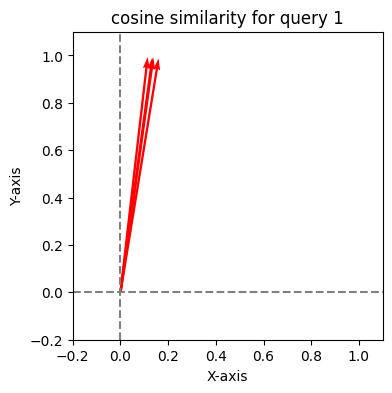

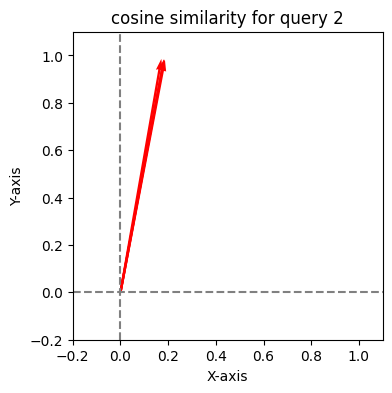

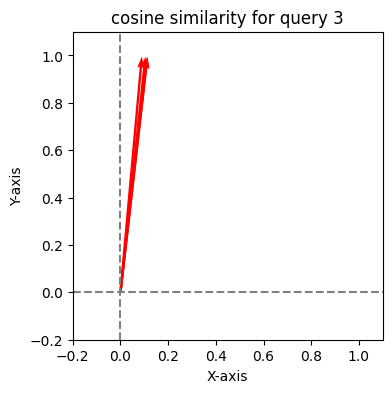

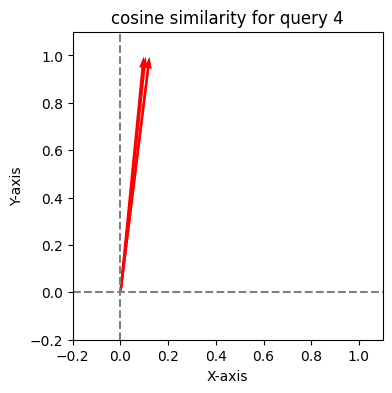

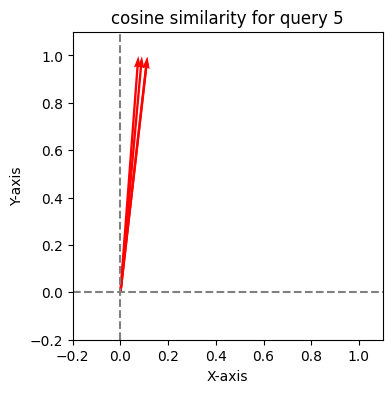

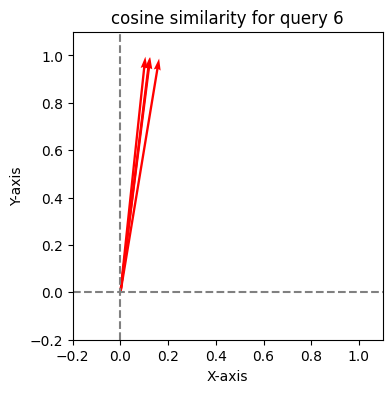

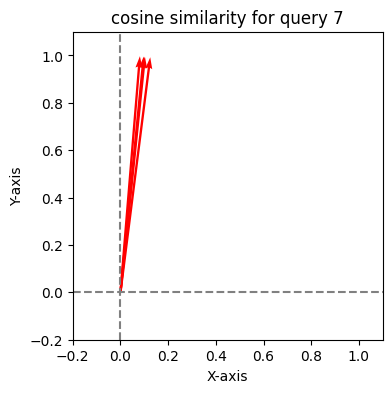

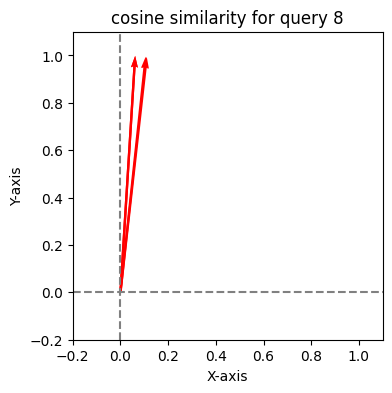

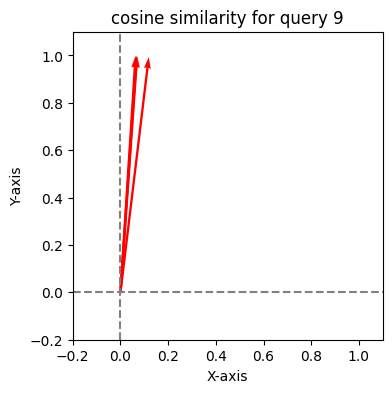

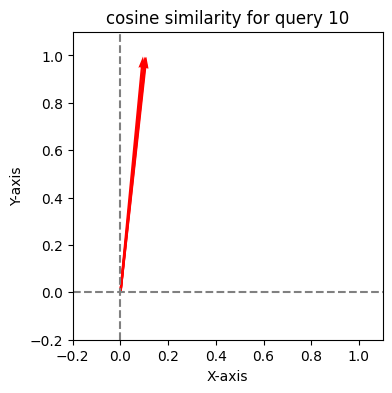

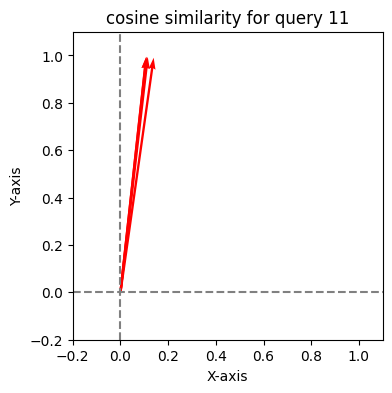

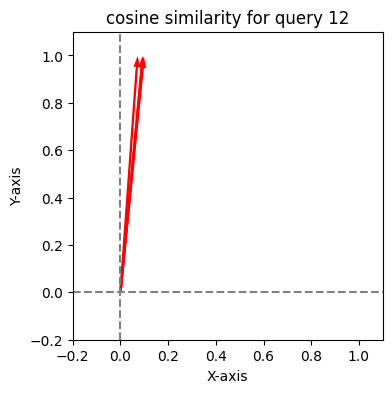

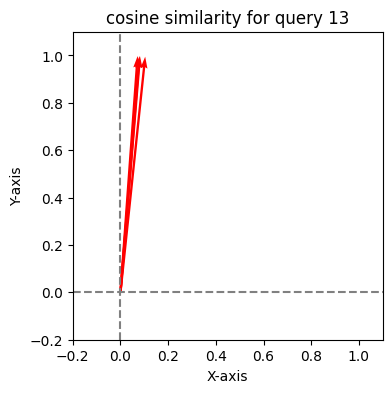

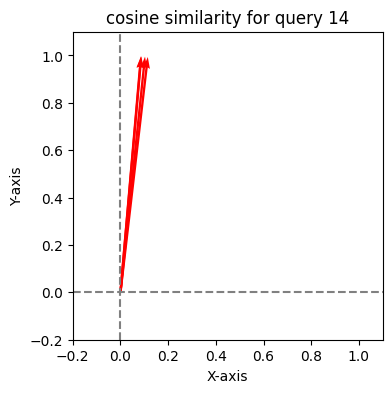

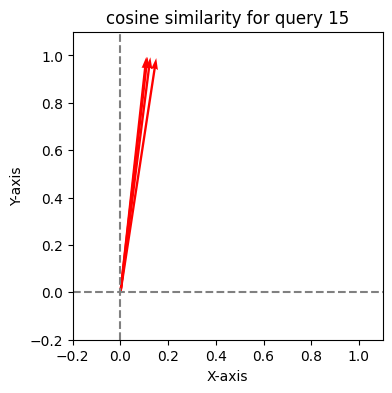

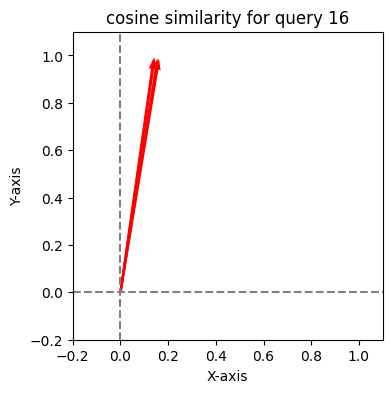

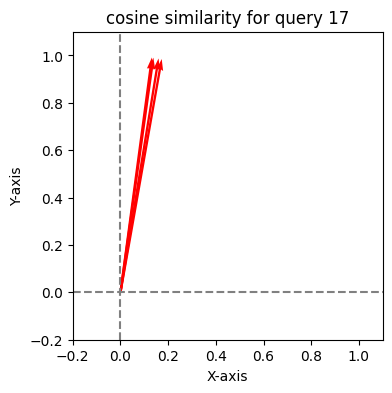

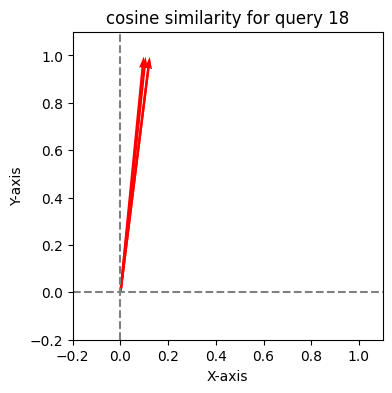

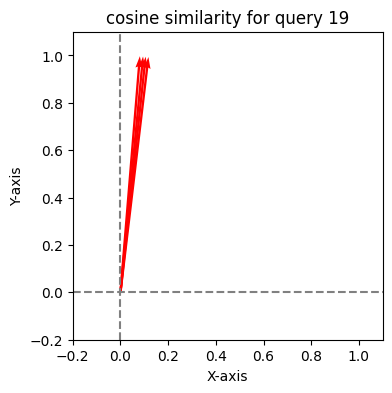

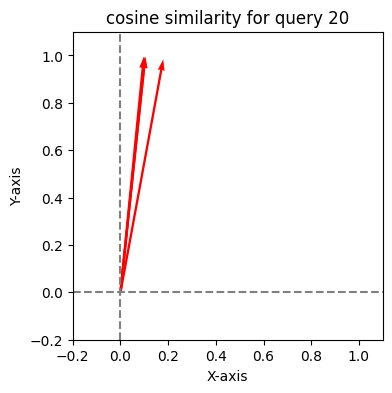

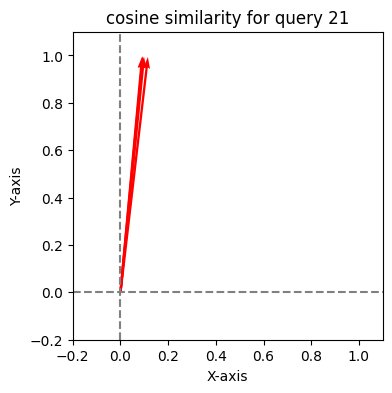

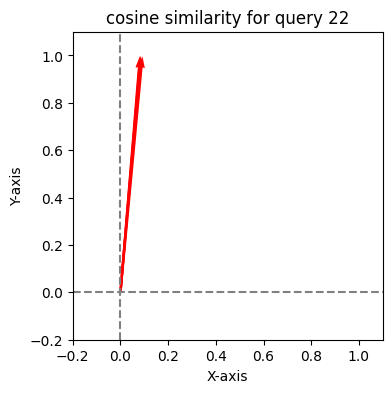

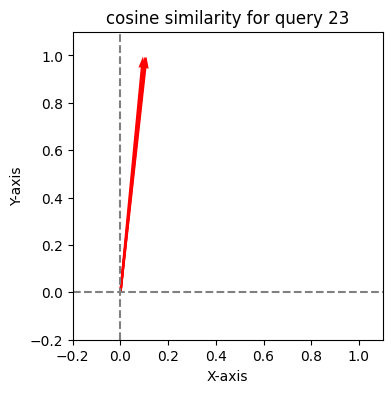

In [37]:
import matplotlib.pyplot as plt
import numpy as np
for j in range(23):
    plt.figure(figsize=(4, 4))
    for i in finalDocs[j]:
        cos_similarity = similarityQuery[j][i-1]
        theta = np.arccos(cos_similarity)
        x = np.cos(theta)
        y = np.sin(theta)
        plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='red')
    plt.xlim(-0.2, 1.1)
    plt.ylim(-0.2, 1.1)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'cosine similarity for query {j+1}')



<hr>

# Question 3: Term-At-A-Time Processing

## Step a: Use the TF-IDF Matrix

In [38]:
print(tf_idf)

{'1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3010299956639813, 0.0, 0.0, 0.0, 0.0], '10': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8239087409443188, 0.0, 0.0, 0.0, 0.8239087409443188, 0.8239087409443188, 0.0, 0.0, 0.0], '100': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3010299956639813, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '100000': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3010299956639813, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '1015': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3010299956639813, 0.0, 0.0, 0.0, 0.0, 0.0], '120': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3010299956639813, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '1234': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3010299956639813, 0.0, 0.0, 0.0, 0.0, 0.0], '15': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.

<hr>

## step b: Implement Term-at-a-Time Processing

In [39]:
def TermAtATime(queryList, sortedDictionary, tf_idf):
    acc = dict()
    for i in range(1, 21):
        acc[i] = 0
    for term in queryList:
        if term in sortedDictionary.keys():
            for docID in sortedDictionary[term]["postingList"].keys():
                acc[docID] += tf_idf[term][docID-1]
    return acc.items()

<hr>

## Step c: Implement Term-at-a-Time Processing

In [40]:
import heapq
queries = open("./queries/queries/queries.txt", 'r')
translator = str.maketrans('', '', string.punctuation)

while True:
    query = queries.readline()
    if not query:
        break
    if query == '\n':
        continue
    print(query[:-1])
    preprocessedQuery = query.lower().translate(translator)
    queryList = list(preprocessedQuery.split())    
    tAat = TermAtATime(queryList, sortedDictionary, tf_idf)
    
    minHeap = []
    heapq.heapify(minHeap)
    for items in tAat:
        heapq.heappush(minHeap, (items[1], items[0]))
    minHeapResult = heapq.nlargest(4, minHeap)
    
    result = [i[1] for i in minHeapResult]
    print(result)


What safety measures should be implemented to prevent injuries during community sports events?
[5, 13, 20, 7]
How can local governments balance the economic benefits of community events with the potential disruptions they may cause to residents?
[7, 4, 9, 8]
What was the total weight of debris removed?
[10, 16, 3, 6]
Who organized the community cleanup event?
[10, 19, 3, 8]
What items were found during the cleanup?
[10, 19, 3, 6]
What are the financial impacts of short-term rentals?
[7, 9, 6, 14]
How do residents feel about rental regulations?
[7, 9, 16, 17]
What challenges arise from rising housing costs?
[17, 12, 16, 14]
How does housing instability affect mental health in communities?
[12, 19, 7, 14]
What resources are available for supporting mental health in neighborhoods?
[12, 19, 8, 4]
How can community connections mitigate challenges faced by residents?
[6, 4, 19, 8]
What consequences did the reckless driver face after the chase?
[20, 12, 13, 4]
How did Charlie Jenkins change a

<hr>